In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from MyLogisticRegression import LogisticRegression

np.random.seed(666)
X = np.random.normal(0, 1, size=(200, 2))
y = np.array((X[:, 0] ** 2 + X[:, 1] ** 2) < 1.5, dtype=np.int32)

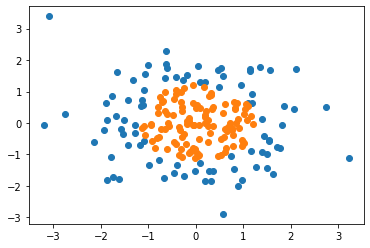

In [33]:
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.show()

In [34]:
log_reg = LogisticRegression()
log_reg.fit(X, y)

0.6816499939842642

In [35]:
log_reg.score(X, y)  # 分类准确度较低

0.605

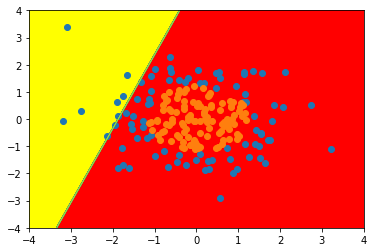

In [36]:
def plot_decision_boundary(model,
                           axis):  # 坐标轴范围
    """绘制决策边界"""
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1] - axis[0]) * 200)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3] - axis[2]) * 200)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['yellow', 'red'])

    plt.contourf(x0, x1, zz, cmap=custom_cmap)
    plt.contour(x0, x1, zz, linewidths=1)


plot_decision_boundary(log_reg, axis=[-4, 4, -4, 4])
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.show()

In [37]:
def PolynomialLogisticRegression(degree):
    # 管道机制实现了对全部步骤的流式化封装和管理
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('log_reg', LogisticRegression())  # 手工实现的LogisticRregression类
    ])

In [38]:
poly_log_reg = PolynomialLogisticRegression(degree=2)  # 最高项次数为2
poly_log_reg.fit(X, y)  # 使用的是第三项("lin_reg", LogisticRegression())的fit方法

Pipeline(steps=[('poly', PolynomialFeatures()),
                ('std_scaler', StandardScaler()),
                ('log_reg',
                 <MyLogisticRegression.LogisticRegression object at 0x00000299FCA36A08>)])

In [39]:
# 拟合效果较好
poly_log_reg.score(X, y)  # 使用的是第三项("lin_reg", LogisticRegression())的score方法

1.0

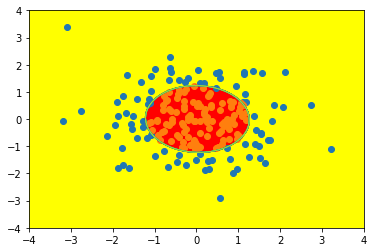

In [40]:
plot_decision_boundary(poly_log_reg, axis=[-4, 4, -4, 4])
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.show()

In [41]:
poly_log_reg2 = PolynomialLogisticRegression(degree=9)  # 最高项次数为10
poly_log_reg2.fit(X, y)

Pipeline(steps=[('poly', PolynomialFeatures(degree=9)),
                ('std_scaler', StandardScaler()),
                ('log_reg',
                 <MyLogisticRegression.LogisticRegression object at 0x0000029980463A48>)])

D:\PythonCode\I_Model\逻辑斯蒂回归与最大熵模型\手工\MyLogisticRegression.py:50: RuntimeWarning: overflow encountered in exp
  return np.exp(t) / (1. + np.exp(t))
D:\PythonCode\I_Model\逻辑斯蒂回归与最大熵模型\手工\MyLogisticRegression.py:50: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(t) / (1. + np.exp(t))


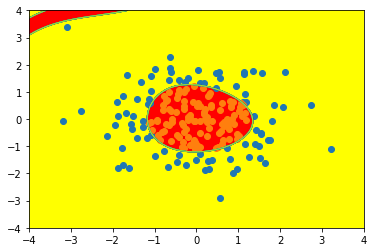

In [42]:
plot_decision_boundary(poly_log_reg2, axis=[-4, 4, -4, 4])  # 决策边界复杂,可能出现了过拟合
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.show()